# Metrics

In [1]:
# Import libraries
import pandas as pd
import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error
import cufflinks as cf
import os
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from math import sqrt

init_notebook_mode()
cf.go_offline()

In [2]:
# Constants
EXECUTION_DATE = "2021-03-16"
DATA_DIR = "data"
INPUT_DIRNAME = "03_predictions"
INPUT_FILENAME = "predictions.csv"
GROUNDTRUTH_FILENAME = "clean_data.csv"
DATE_FORMAT = "%Y-%m-%d"
DAY_PLUS_1 = "DAY_PLUS_1"
DAY_PLUS_7 = "DAY_PLUS_7"
DAY_PLUS_30 = "DAY_PLUS_30"
NB_LAST_DAYS = 30

In [3]:
def load_predictions_data(path: str, date: str, nb_days: int, model_type: str, filename: str) -> pd.DataFrame:
    date_ = datetime.datetime.strptime(date, "%Y-%m-%d")
    dataframes = []
    for d in range(nb_days):
        curr_date = (date_ - datetime.timedelta(days=d)).strftime("%Y-%m-%d")
        try:
            dataframes.append(pd.read_csv(os.path.join(path, curr_date, model_type, filename), index_col=0).rename(columns={"value": "Prediction"}))
        except FileNotFoundError:
            pass
    return pd.concat(dataframes)

def load_groundtruth(date: str, nb_days: str) -> pd.DataFrame:
    date_ = datetime.datetime.strptime(date, "%Y-%m-%d")
    dataframes = []
    for d in range(nb_days):
        curr_date = (date_ - datetime.timedelta(days=d)).strftime("%Y-%m-%d")
        try:
            dataframes.append(pd.read_csv(os.path.join(DATA_DIR, "02_clean", curr_date, "clean_data.csv"), index_col=0))
        except FileNotFoundError:
            pass
    return pd.concat(dataframes).rename(columns={"Close": "Groundtruth"})

In [4]:
# Load data
predictions_1_linear_regression = load_predictions_data(os.path.join(DATA_DIR, INPUT_DIRNAME),
                                                        EXECUTION_DATE,
                                                        NB_LAST_DAYS,
                                                        "DAY_PLUS_1",
                                                        "predictions_linear_regression.csv").rename(columns={"Prediction": "linear_regression"})
predictions_1_gradient_boosting = load_predictions_data(os.path.join(DATA_DIR, INPUT_DIRNAME),
                                                        EXECUTION_DATE,
                                                        NB_LAST_DAYS,
                                                        "DAY_PLUS_1",
                                                        "predictions_gradient_boosting.csv").rename(columns={"Prediction": "gradient_boosting"})
predictions_1_prophet = load_predictions_data(os.path.join(DATA_DIR, INPUT_DIRNAME),
                                                        EXECUTION_DATE,
                                                        NB_LAST_DAYS,
                                                        "DAY_PLUS_1",
                                                        "predictions_prophet.csv").rename(columns={"Prediction": "prophet"})
predictions_7_linear_regression = load_predictions_data(os.path.join(DATA_DIR, INPUT_DIRNAME),
                                                        EXECUTION_DATE,
                                                        NB_LAST_DAYS,
                                                        "DAY_PLUS_7",
                                                        "predictions_linear_regression.csv").rename(columns={"Prediction": "linear_regression"})
predictions_7_gradient_boosting = load_predictions_data(os.path.join(DATA_DIR, INPUT_DIRNAME),
                                                        EXECUTION_DATE,
                                                        NB_LAST_DAYS,
                                                        "DAY_PLUS_7",
                                                        "predictions_gradient_boosting.csv").rename(columns={"Prediction": "gradient_boosting"})
predictions_7_prophet = load_predictions_data(os.path.join(DATA_DIR, INPUT_DIRNAME),
                                                        EXECUTION_DATE,
                                                        NB_LAST_DAYS,
                                                        "DAY_PLUS_7",
                                                        "predictions_prophet.csv").rename(columns={"Prediction": "prophet"})
predictions_30_linear_regression = load_predictions_data(os.path.join(DATA_DIR, INPUT_DIRNAME),
                                                        EXECUTION_DATE,
                                                        NB_LAST_DAYS,
                                                        "DAY_PLUS_30",
                                                        "predictions_linear_regression.csv").rename(columns={"Prediction": "linear_regression"})
predictions_30_gradient_boosting = load_predictions_data(os.path.join(DATA_DIR, INPUT_DIRNAME),
                                                        EXECUTION_DATE,
                                                        NB_LAST_DAYS,
                                                        "DAY_PLUS_30",
                                                        "predictions_gradient_boosting.csv").rename(columns={"Prediction": "gradient_boosting"})
predictions_30_prophet = load_predictions_data(os.path.join(DATA_DIR, INPUT_DIRNAME),
                                                        EXECUTION_DATE,
                                                        NB_LAST_DAYS,
                                                        "DAY_PLUS_30",
                                                        "predictions_prophet.csv").rename(columns={"Prediction": "prophet"})
groundtruth = load_groundtruth(EXECUTION_DATE, NB_LAST_DAYS)

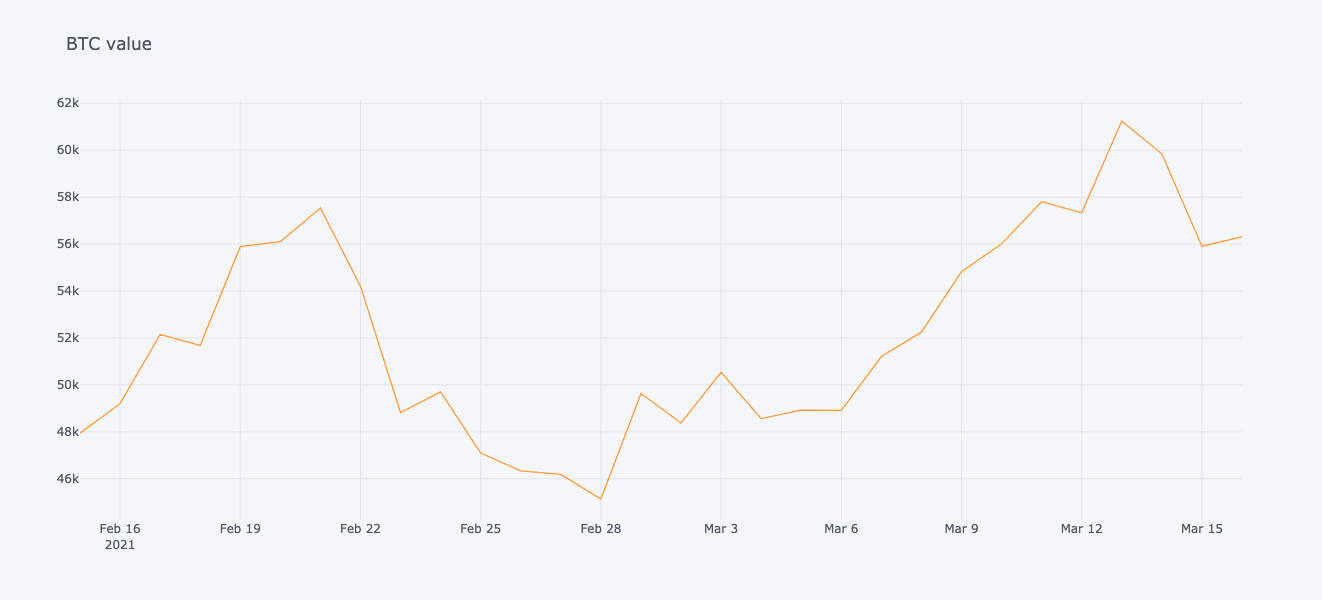

In [5]:
iplot(groundtruth.iplot(asFigure=True, kind="scatter", title="BTC value", dimensions=(1400, 600)))

### MAPE on model D+1

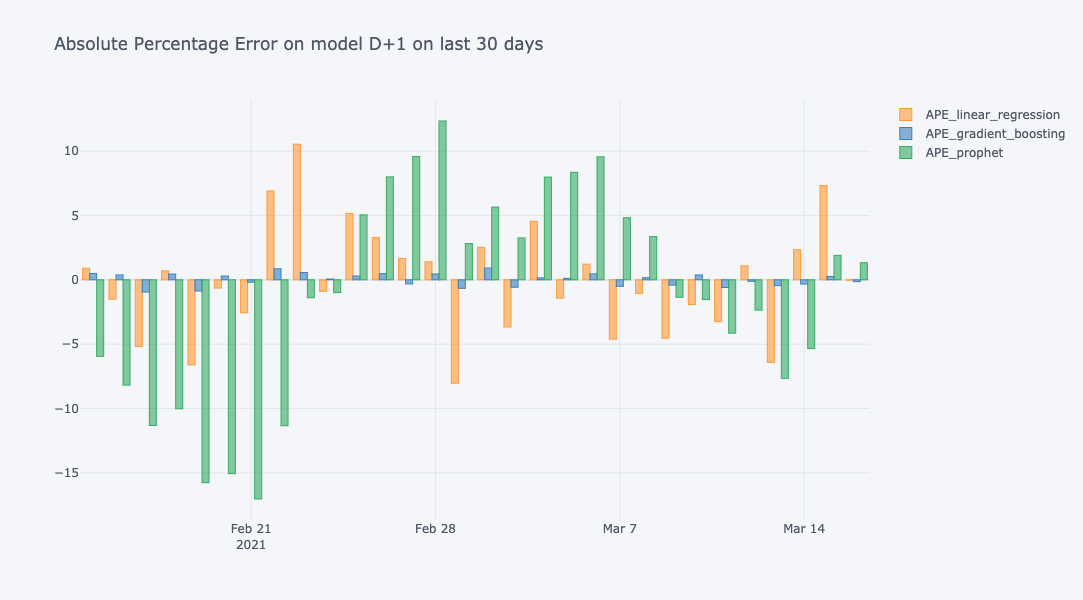

In [6]:
predictions_1 = predictions_1_linear_regression.join(predictions_1_gradient_boosting).join(predictions_1_prophet)

# Compute metrics
APE1 = predictions_1.join(groundtruth)
for model_name in ["linear_regression", "gradient_boosting", "prophet"]:
    APE1["APE_%s" % model_name] = ((APE1[model_name] - APE1["Groundtruth"]) / APE1["Groundtruth"]) * 100

iplot(APE1[["APE_linear_regression", "APE_gradient_boosting", "APE_prophet"]].iplot(asFigure=True, kind="bar", title="Absolute Percentage Error on model D+1 on last %i days" % APE1.shape[0], dimensions=(1400, 600)))

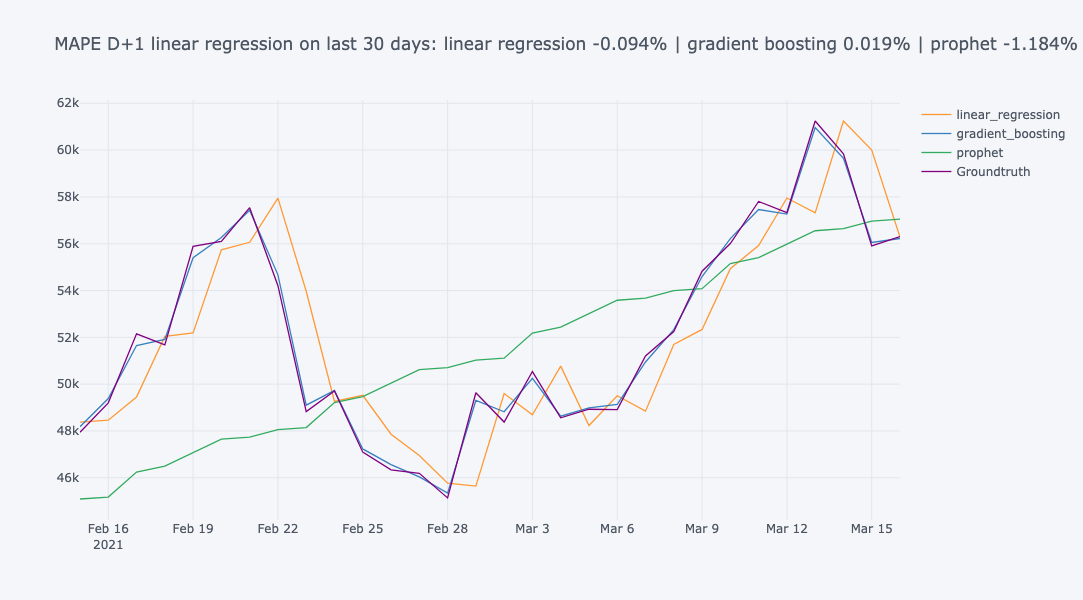

In [7]:
# Display
iplot(predictions_1.join(groundtruth).iplot(asFigure=True,
                                            kind="scatter",
                                            title="MAPE D+1 on last {} days: linear regression {:.3f}% | gradient boosting {:.3f}% | prophet {:.3f}%".format(
                                                APE1.shape[0],
                                                APE1["APE_linear_regression"].mean(),
                                                APE1["APE_gradient_boosting"].mean(),
                                                APE1["APE_prophet"].mean()),
                                            dimensions=(1400, 600)))

### MAPE on model D+7

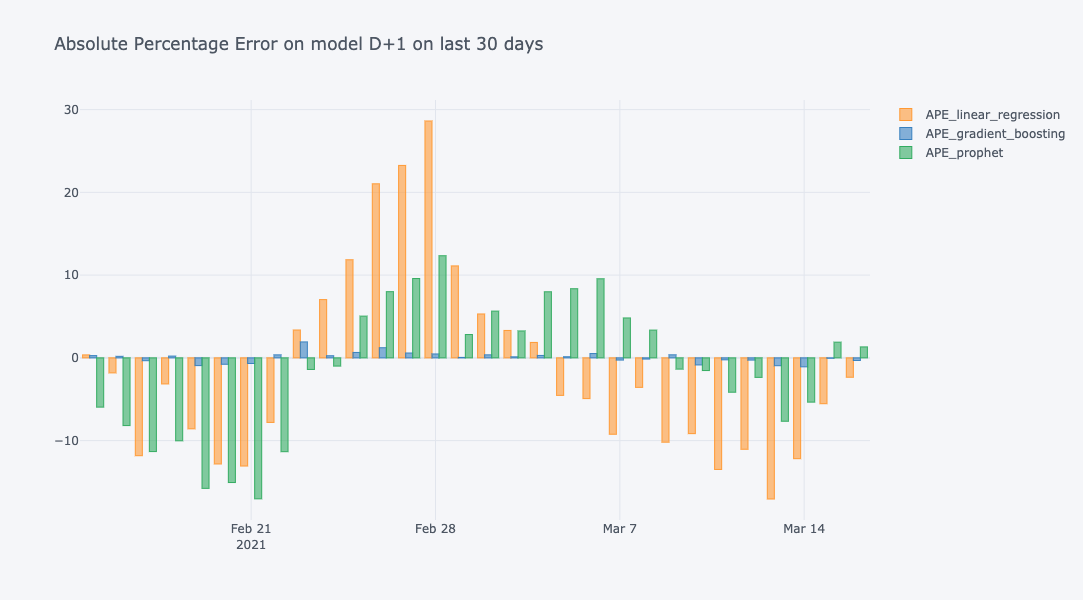

In [8]:
predictions_7 = predictions_7_linear_regression.join(predictions_7_gradient_boosting).join(predictions_7_prophet)

# Compute metrics
APE7 = predictions_7.join(groundtruth)
for model_name in ["linear_regression", "gradient_boosting", "prophet"]:
    APE7["APE_%s" % model_name] = ((APE7[model_name] - APE7["Groundtruth"]) / APE7["Groundtruth"]) * 100

iplot(APE7[["APE_linear_regression", "APE_gradient_boosting", "APE_prophet"]].iplot(asFigure=True,
                                                                                    kind="bar",
                                                                                    title="Absolute Percentage Error on model D+1 on last %i days" % APE7.shape[0], dimensions=(1400, 600)))

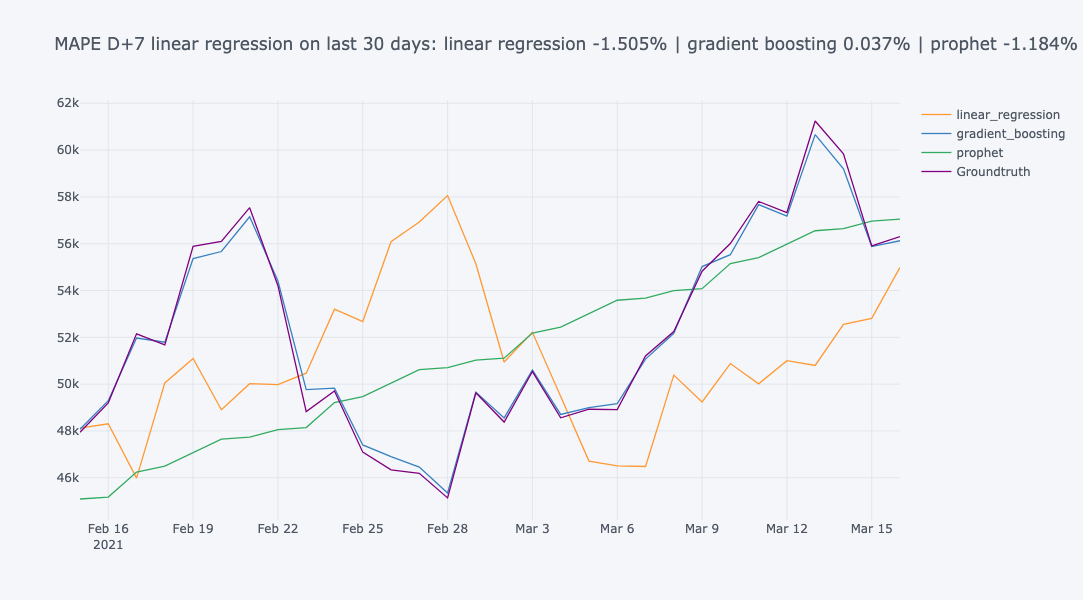

In [9]:
# Display
iplot(predictions_7.join(groundtruth).iplot(asFigure=True,
                                            kind="scatter",
                                            title="MAPE D+7 on last {} days: linear regression {:.3f}% | gradient boosting {:.3f}% | prophet {:.3f}%".format(
                                                APE7.shape[0],
                                                APE7["APE_linear_regression"].mean(),
                                                APE7["APE_gradient_boosting"].mean(),
                                                APE7["APE_prophet"].mean()),
                                            dimensions=(1400, 600)))

### MAPE on model D+30

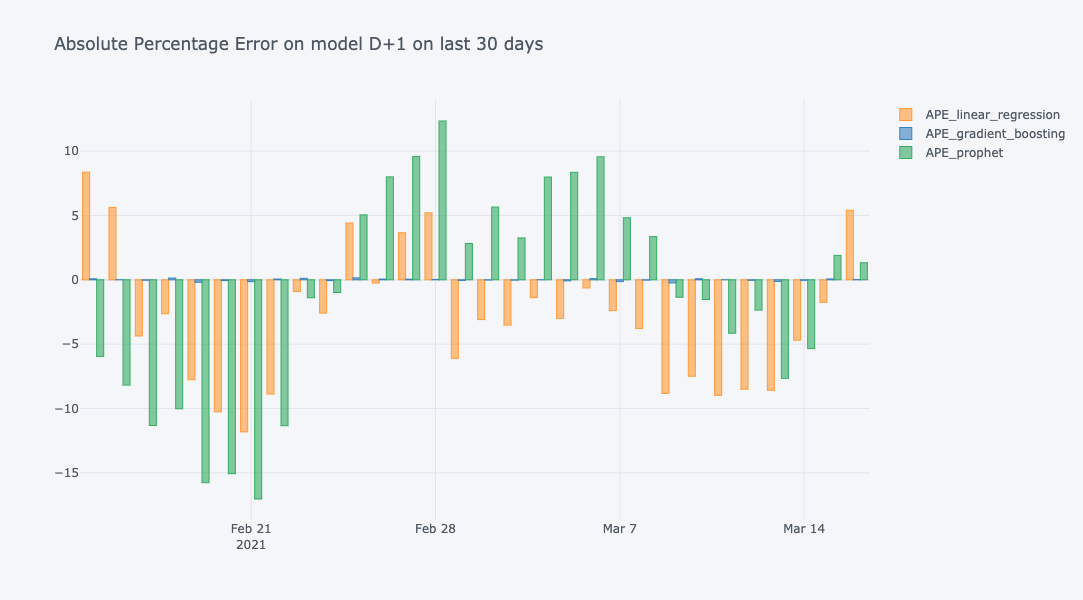

In [10]:
predictions_30 = predictions_30_linear_regression.join(predictions_30_gradient_boosting).join(predictions_30_prophet)

# Compute metrics
APE30 = predictions_30.join(groundtruth)
for model_name in ["linear_regression", "gradient_boosting", "prophet"]:
    APE30["APE_%s" % model_name] = ((APE30[model_name] - APE30["Groundtruth"]) / APE30["Groundtruth"]) * 100

iplot(APE30[["APE_linear_regression", "APE_gradient_boosting", "APE_prophet"]].iplot(asFigure=True,
                                                                                    kind="bar",
                                                                                    title="Absolute Percentage Error on model D+1 on last %i days" % APE30.shape[0], dimensions=(1400, 600)))

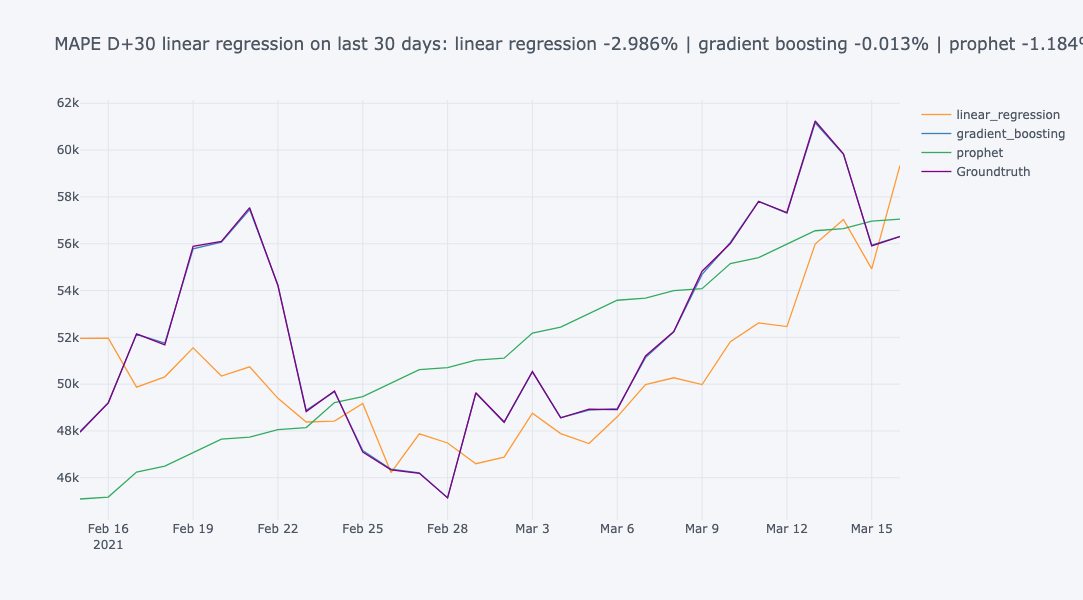

In [11]:
# Display
iplot(predictions_30.join(groundtruth).iplot(asFigure=True,
                                            kind="scatter",
                                            title="MAPE D+30 on last {} days: linear regression {:.3f}% | gradient boosting {:.3f}% | prophet {:.3f}%".format(
                                                APE30.shape[0],
                                                APE30["APE_linear_regression"].mean(),
                                                APE30["APE_gradient_boosting"].mean(),
                                                APE30["APE_prophet"].mean()),
                                            dimensions=(1400, 600)))